In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0")
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
torch.set_default_tensor_type('torch.cuda.FloatTensor')

True
Tesla P100-PCIE-16GB


# Misspecified Models

Adding 25% to the number of dimensions and training on the original amount

In [3]:
sigma1 = 0.1 #SNR = 100
sigma2 = 0.5 #SNR = 4
sigma3 = 1 #SNR = 1

sigmas = [sigma1, sigma2, sigma3]

## 200 Samples

In [5]:
n = 200

small_d = torch.arange(5,170,5)
around_n = torch.arange(170,196,2)
around_n_greater = torch.arange(196,204,1)
large_d = torch.arange(204,250,2)
larger_d = torch.arange(250,500,5)
largest_d = torch.arange(500,700,10)


d_vals = torch.cat([small_d,around_n,around_n_greater,large_d,larger_d,largest_d])
print(d_vals.size()[0])
M = d_vals.size()[0]

sim = 35

147


In [6]:
test_mse100 = torch.zeros((M,sim))
test_mse4 = torch.zeros((M,sim))
test_mse1 = torch.zeros((M,sim))

print(test_mse100.shape)

torch.Size([147, 35])


In [7]:
# Creating X and Y for each dimension and running 35 simulations
n_test = 300

for s in sigmas:
  for i in range(M):
    for j in range(sim):
      new_d = int(d_vals[i]*1.25)
      mean = torch.zeros((new_d,))
      Id = torch.eye(new_d) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n,)) #X data
      X2 = norm.sample((n_test,)) #X test

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n,)), torch.full((n,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y

      #Using original number of parameters to train:
      train_X = X[:,:d_vals[i]]
      test_X = X2[:,:d_vals[i]]

      if n < d_vals[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        test_mse100[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1[i,j] = torch.mean((Y2 - test_pred)**2)

Now, we plot:

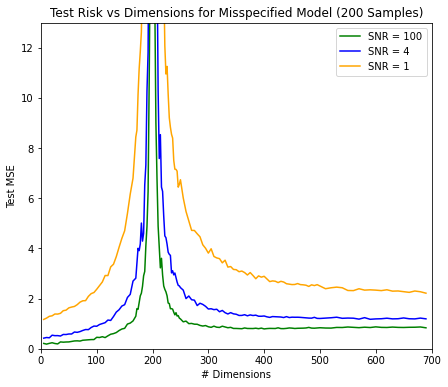

In [8]:
avgs_100 = torch.mean(test_mse100, 1)
avgs_4 = torch.mean(test_mse4, 1)
avgs_1 = torch.mean(test_mse1, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Misspecified Model (200 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,700)
plt.plot(d_vals.cpu().numpy(), avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals.cpu().numpy(), avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals.cpu().numpy(), avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

## 500 Samples

In [9]:
n2 = 500

small_d2 = torch.arange(5,380,10)
around_n2 = torch.arange(380,470,5)
around_n_greater2 = torch.arange(470,490,2)
large_d2 = torch.arange(490,510,1)
larger_d2 = torch.arange(510,600,2)
more_d2 = torch.arange(600,700,5)
largest_d2 = torch.arange(700,1000,5)
d2 = torch.arange(1000,1250,10)
biggestd2 = torch.arange(1250,2000,20)


d_vals2 = torch.cat([small_d2,around_n2,around_n_greater2,large_d2,
                     larger_d2,more_d2,largest_d2,d2,biggestd2])
print(d_vals2.size()[0])
M2 = d_vals2.size()[0]


274


In [10]:
test_mse100_2 = torch.zeros((M2,sim))
test_mse4_2 = torch.zeros((M2,sim))
test_mse1_2 = torch.zeros((M2,sim))

print(test_mse100_2.shape)

torch.Size([274, 35])


In [11]:
# Creating X and Y for each dimension and running 35 simulations
n_test = 700

for s in sigmas:
  for i in range(M2):
    for j in range(sim):
      new_d = int(d_vals2[i]*1.25)
      mean = torch.zeros((new_d,))
      Id = torch.eye(new_d) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n2,)) #X data
      X2 = norm.sample((n_test,)) #X test

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n2,)), torch.full((n2,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y

      #Using original number of parameters to train:
      train_X = X[:,:d_vals2[i]]
      test_X = X2[:,:d_vals2[i]]

      if n2 < d_vals2[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        test_mse100_2[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4_2[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1_2[i,j] = torch.mean((Y2 - test_pred)**2)

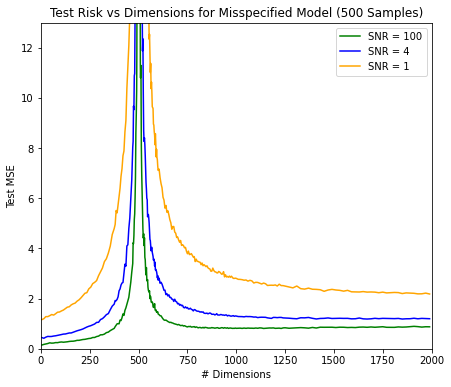

In [12]:
avgs_100_2 = torch.mean(test_mse100_2, 1)
avgs_4_2 = torch.mean(test_mse4_2, 1)
avgs_1_2 = torch.mean(test_mse1_2, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Misspecified Model (500 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,2000)
plt.plot(d_vals2.cpu().numpy(), avgs_100_2.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals2.cpu().numpy(), avgs_4_2.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals2.cpu().numpy(), avgs_1_2.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.xticks(torch.arange(0,2001,step=250).cpu().numpy())
plt.plot()
plt.legend(loc="best")
plt.show()

## 1000 Samples

In [13]:
n3 = 1000

small_d3 = torch.arange(5,500,20)
still_small_d3 = torch.arange(500,750,10)
around_n3 = torch.arange(750,950,5)
around_n2_smaller3 = torch.arange(950,990,2)
around_n_greater3 = torch.arange(990,1010,1)
large_d3 = torch.arange(1010,1050,2)
larger_d3 = torch.arange(1050,1500,5)
more_d3 = torch.arange(1500,1900,10)
largest_d3 = torch.arange(1900,3000,20)


d_vals3 = torch.cat([small_d3,still_small_d3, around_n3,around_n_greater3,around_n2_smaller3,
                     large_d3,larger_d3,more_d3,largest_d3])
print(d_vals3.size()[0])
M3 = d_vals3.size()[0]

sim2 = 25

335


In [14]:
test_mse100_3 = torch.zeros((M3,sim2))
test_mse4_3 = torch.zeros((M3,sim2))
test_mse1_3 = torch.zeros((M3,sim2))

print(test_mse100_3.shape)

torch.Size([335, 25])


In [15]:
#Running 25 simulations
n_test = 900 

for s in sigmas:
  for i in range(M3):
    for j in range(sim2):
      new_d = int(d_vals3[i]*1.25)
      mean = torch.zeros((new_d,))
      Id = torch.eye(new_d) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n3,)) #X data
      X2 = norm.sample((n_test,)) #X test (using 900 test samples)

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n3,)), torch.full((n3,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y
    
      #Using original number of parameters to train:
      train_X = X[:,:d_vals3[i]]
      test_X = X2[:,:d_vals3[i]]

      if n3 < d_vals3[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        test_mse100_3[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4_3[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1_3[i,j] = torch.mean((Y2 - test_pred)**2)

Next, we plot:

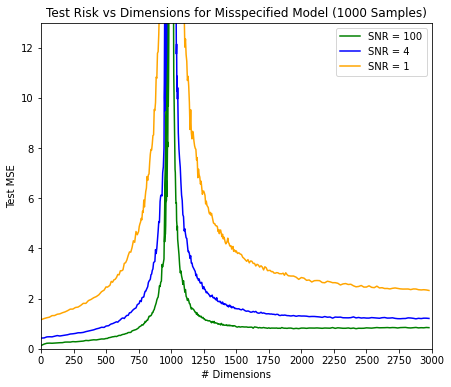

In [16]:
avgs_100_3 = torch.mean(test_mse100_3, 1)
avgs_4_3 = torch.mean(test_mse4_3, 1)
avgs_1_3 = torch.mean(test_mse1_3, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Misspecified Model (1000 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,3000)
plt.plot(d_vals3.cpu().numpy(), avgs_100_3.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals3.cpu().numpy(), avgs_4_3.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals3.cpu().numpy(), avgs_1_3.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.xticks(torch.arange(0,3001,step=250).cpu().numpy())
plt.plot()
plt.legend(loc="best")
plt.show()

Plotting side-by-side

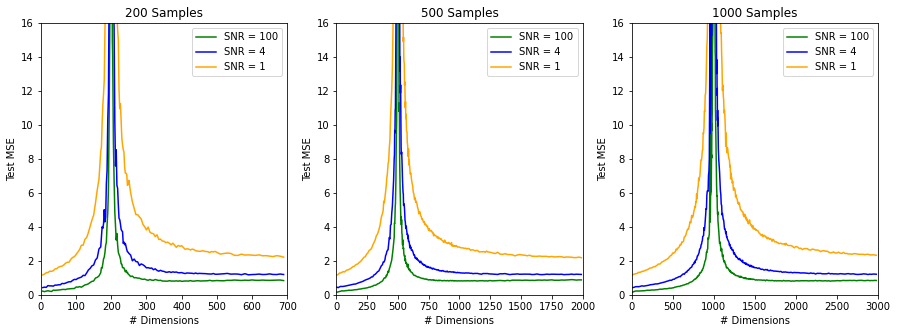

In [17]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1, 3, 1)
plt.plot(d_vals.cpu().numpy(), avgs_100.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(d_vals.cpu().numpy(), avgs_4.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(d_vals.cpu().numpy(), avgs_1.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('200 Samples')
plt.ylabel('Test MSE')
plt.ylim(0,16)
plt.xlim(0,700)
plt.xlabel('# Dimensions')
plt.legend(loc="best")

plt.subplot(1, 3, 2)
plt.plot(d_vals2.cpu().numpy(), avgs_100_2.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(d_vals2.cpu().numpy(), avgs_4_2.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(d_vals2.cpu().numpy(), avgs_1_2.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('500 Samples')
plt.ylim(0,16)
plt.xlim(0,2000)
plt.xticks(torch.arange(0,2001,step=250).cpu().numpy())
plt.ylabel('Test MSE')
plt.xlabel('# Dimensions')
plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.plot(d_vals3.cpu().numpy(), avgs_100_3.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(d_vals3.cpu().numpy(), avgs_4_3.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(d_vals3.cpu().numpy(), avgs_1_3.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('1000 Samples')
plt.ylim(0,16)
plt.xlim(0,3000)
plt.xticks(torch.arange(0,3001,step=500).cpu().numpy())
plt.ylabel('Test MSE')
plt.xlabel('# Dimensions')
plt.legend(loc="best")

plt.show()

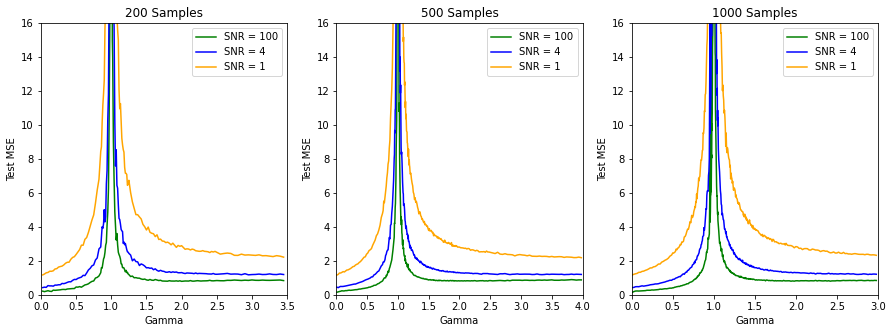

In [18]:
plt.rcParams["figure.figsize"] = (15,5)

g1 = d_vals / n

plt.subplot(1, 3, 1)
plt.plot(g1.cpu().numpy(), avgs_100.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(g1.cpu().numpy(), avgs_4.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(g1.cpu().numpy(), avgs_1.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('200 Samples')
plt.ylabel('Test MSE')
plt.ylim(0,16)
plt.xlim(0,3.5)
plt.xlabel('Gamma')
plt.legend(loc="best")

g2 = d_vals2 / n2

plt.subplot(1, 3, 2)
plt.plot(g2.cpu().numpy(), avgs_100_2.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(g2.cpu().numpy(), avgs_4_2.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(g2.cpu().numpy(), avgs_1_2.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('500 Samples')
plt.ylim(0,16)
plt.xlim(0,4)
plt.ylabel('Test MSE')
plt.xlabel('Gamma')
plt.legend(loc="best")

g3 = d_vals3 / n3

plt.subplot(1, 3, 3)
plt.plot(g3.cpu().numpy(), avgs_100_3.cpu().numpy(), lw=1.5, label='SNR = 100', color='green')
plt.plot(g3.cpu().numpy(), avgs_4_3.cpu().numpy(), lw=1.5, label='SNR = 4', color='blue')
plt.plot(g3.cpu().numpy(), avgs_1_3.cpu().numpy(), lw=1.5, label='SNR = 1', color='orange')
plt.title('1000 Samples')
plt.ylim(0,16)
plt.xlim(0,3)
plt.ylabel('Test MSE')
plt.xlabel('Gamma')
plt.legend(loc="best")

plt.show()

# Further Misspecifications

Next, we will try to further misspecify the model by adding 25% of parameters and training on the original parameters PLUS extra irrelevant variables. Doing this for only 200 samples because I've seen the number of samples doesn't change the curve much. The only thing that really affects it is the overparameterized ratio.

## 200 Samples

In [19]:
r2_test_mse100 = torch.zeros((M,sim))
r2_test_mse4 = torch.zeros((M,sim))
r2_test_mse1 = torch.zeros((M,sim))

print(r2_test_mse100.shape)

torch.Size([147, 35])


In [24]:
# Creating X and Y for each dimension and running 35 simulations
n_test = 350
p = 75

for s in sigmas:
  for i in range(M):
    for j in range(sim):
      new_d = int(d_vals[i]*1.25)
      mean = torch.zeros((new_d,))
      Id = torch.eye(new_d) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n,)) #X data
      X2 = norm.sample((n_test,)) #X test

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n,)), torch.full((n,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y

      #Using original number of parameters + 75 extra irrelevant parameters to train:
      Ip = torch.eye(p)
      norm2 = torch.distributions.multivariate_normal.MultivariateNormal(mean, Ip)
      X_rand = norm.sample((n,))
      X_rand2 = norm.sample((n_test,))

      train_X = torch.cat((X[:,:d_vals[i]], X_rand), -1)
      test_X = torch.cat((X2[:,:d_vals[i]], X_rand2), -1)


      if n < train_X.shape[1]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        r2_test_mse100[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        r2_test_mse4[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        r2_test_mse1[i,j] = torch.mean((Y2 - test_pred)**2)

Now, we plot:

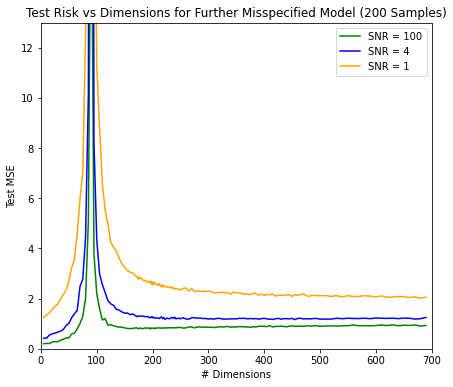

In [25]:
r2_avgs_100 = torch.mean(r2_test_mse100, 1)
r2_avgs_4 = torch.mean(r2_test_mse4, 1)
r2_avgs_1 = torch.mean(r2_test_mse1, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Further Misspecified Model (200 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,700)
plt.plot(d_vals.cpu().numpy(), r2_avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals.cpu().numpy(), r2_avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals.cpu().numpy(), r2_avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

## Anisotropic features

Now we try to leave samples out when there is covariance between the data. 

The covariance matrix should be symmetric, PSD, and the diagonals should be 1. Doing this for only 200 samples because we've seen that only the over-parameterized ratio matters.

In [39]:
cov_test_mse100 = torch.zeros((M,sim))
cov_test_mse4 = torch.zeros((M,sim))
cov_test_mse1 = torch.zeros((M,sim))

print(cov_test_mse100.shape)

torch.Size([147, 35])


This time we will add 40% of samples, then use the original number to train

In [51]:
# Creating X and Y for each dimension and running 35 simulations
n_test = 300

for s in sigmas:
  for i in range(M):
    for j in range(sim):
      new_d = int(d_vals[i]*1.4)
      mean = torch.zeros((new_d,))
      a_matrix = 0.05 * torch.rand(new_d,new_d)  #Creating random matrix
      upper_triag = torch.triu(a_matrix, diagonal=1) #Creating the upper triangle values
      lower_triag = torch.t(upper_triag)      #Lower triangle values
      diags = torch.eye(new_d)                #Diagonals should be 1
      cov = upper_triag + diags + lower_triag  #Symmetric PD matrix that we will use for covariance

      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov)
      X = norm.sample((n,)) #X data
      X2 = norm.sample((n_test,)) #X test

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n,)), torch.full((n,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y

      #Using original number of parameters to train:
      train_X = X[:,:d_vals[i]]
      test_X = X2[:,:d_vals[i]]

      if n < d_vals[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        cov_test_mse100[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        cov_test_mse4[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        cov_test_mse1[i,j] = torch.mean((Y2 - test_pred)**2)

Now we plot

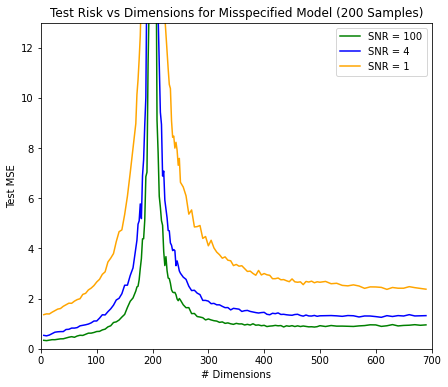

In [52]:
cov_avgs_100 = torch.mean(cov_test_mse100, 1)
cov_avgs_4 = torch.mean(cov_test_mse4, 1)
cov_avgs_1 = torch.mean(cov_test_mse1, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Misspecified Model (200 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,700)
plt.plot(d_vals.cpu().numpy(), cov_avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals.cpu().numpy(), cov_avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals.cpu().numpy(), cov_avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

Now, we can add irrelevant variables:

In [53]:
cov2_test_mse100 = torch.zeros((M,sim))
cov2_test_mse4 = torch.zeros((M,sim))
cov2_test_mse1 = torch.zeros((M,sim))

print(cov2_test_mse100.shape)

torch.Size([147, 35])


In [56]:
# Creating X and Y for each dimension and running 35 simulations

for s in sigmas:
  for i in range(M):
    for j in range(sim):
      new_d = int(d_vals[i]*1.4)
      mean = torch.zeros((new_d,))
      a_matrix = 0.05 * torch.rand(new_d,new_d)  #Creating random matrix
      upper_triag = torch.triu(a_matrix, diagonal=1) #Creating the upper triangle values
      lower_triag = torch.t(upper_triag)      #Lower triangle values
      diags = torch.eye(new_d)                #Diagonals should be 1
      cov = upper_triag + diags + lower_triag  #Symmetric PD matrix that we will use for covariance

      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov)
      X = norm.sample((n,)) #X data
      X2 = norm.sample((n_test,)) #X test

      beta = torch.rand(new_d)  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n,)), torch.full((n,), s))
      noise2 = torch.normal(torch.zeros((n_test,)), torch.full((n_test,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y

      #Using original number of parameters + 75 extra irrelevant parameters to train:
      p = 75
      Ip = torch.eye(p)
      norm2 = torch.distributions.multivariate_normal.MultivariateNormal(mean, Ip)
      X_rand = norm.sample((n,))
      X_rand2 = norm.sample((n_test,))

      train_X = torch.cat((X[:,:d_vals[i]], X_rand), -1)
      test_X = torch.cat((X2[:,:d_vals[i]], X_rand2), -1)


      if n < train_X.shape[1]:
        beta_hat = torch.matmul(torch.linalg.pinv(train_X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(train_X),train_X))
        p2 = torch.matmul(p1,torch.t(train_X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(test_X,beta_hat)

      if s == 0.1:
        cov2_test_mse100[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        cov2_test_mse4[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        cov2_test_mse1[i,j] = torch.mean((Y2 - test_pred)**2)

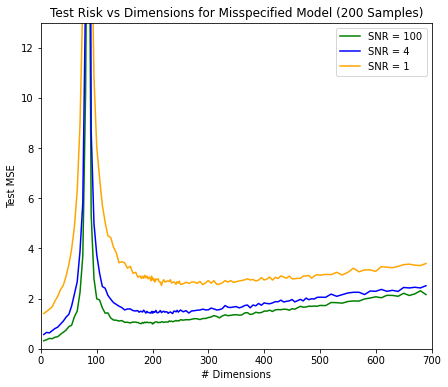

In [57]:
cov2_avgs_100 = torch.mean(cov2_test_mse100, 1)
cov2_avgs_4 = torch.mean(cov2_test_mse4, 1)
cov2_avgs_1 = torch.mean(cov2_test_mse1, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Misspecified Model (200 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,700)
plt.plot(d_vals.cpu().numpy(), cov2_avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals.cpu().numpy(), cov2_avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals.cpu().numpy(), cov2_avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()